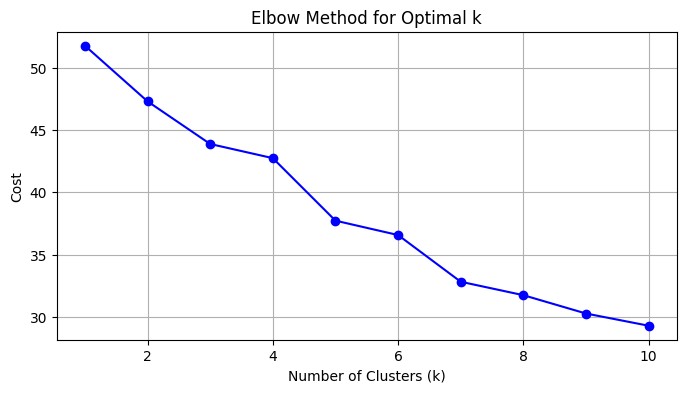

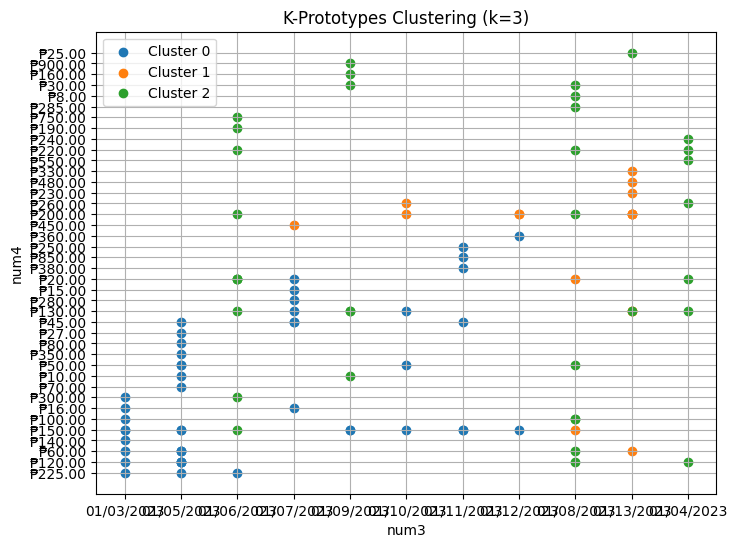

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

data = pd.read_csv('al.csv')

data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0


# # Create a DataFrame from the given data
# data = {
#     'num1': ['two', 'five', 'tree', 'nine', 'seven'],
#     'num2': ['one', 'for', 'two', 'ten', 'eight'],
#     'num3': ['2', '5', '3', '9', '7'],
#     'num4': ['1', '4', '2', '10', '8']
# }
df = pd.DataFrame(data)

# Define the categorical and numerical columns
categorical_cols = ['ID','TRANSACTION','BRAND','ITEM','PRICE','DATE']
numerical_cols = ['QUANTITY']

# Convert numerical columns to numeric type
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

# Combine categorical and numerical data into a single DataFrame
df_combined = df.copy()

# Determine the optimal number of clusters (k) using the elbow method
cost = []
for k in range(1, 11):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(df_combined.values, categorical=[0, 1, 2, 3, 5, 6])
    cost.append(kproto.cost_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), cost, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow method, select the optimal value of k (e.g., k=3 in this case)
optimal_k = 3

# Perform K-Prototypes clustering with the optimal value of k
kproto = KPrototypes(n_clusters=optimal_k, init='Cao', verbose=0)
clusters = kproto.fit_predict(df_combined.values, categorical=[0, 1, 2, 3, 5, 6])

# Add cluster assignments to the DataFrame
df['cluster'] = clusters

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster_num in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['DATE'], cluster_data['PRICE'], label=f'Cluster {cluster_num}')

plt.xlabel('num3')
plt.ylabel('num4')
plt.title(f'K-Prototypes Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
